<a href="https://colab.research.google.com/github/alexlopespereira/mba_enap/blob/main/Teoria/Aula7_Teoria_Esteganografia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 7 - Teoria - Esteganografia

In [ ]:
# Instalação de pacotes python
!pip install bitarray

     |████████████████████████████████| 71kB 6.0MB/s 
  Created wheel for bitarray: filename=bitarray-2.1.0-cp37-cp37m-linux_x86_64.whl size=147715 sha256=c552f706cad1cc8a19bb8169d3383e51093de982fd96e52d867b06c9c29c0fb1
  Stored in directory: /root/.cache/pip/wheels/35/50/3a/d5c4da0c9ab92707530efe6da2f908c89946c16c1da918b503
Successfully built bitarray


In [ ]:
import urllib.request
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from bitarray import bitarray
%matplotlib inline

In [ ]:
# https://calculareconverter.com.br/binario-para-decimal/
print(0b11111110)
print(0b11111111)

254
255


[[  0   0   0 255 255 255]
 [  0   0   0 255 255 255]
 [  0   0   0 255 255 255]
 [255 255 255   0   0   0]
 [255 255 255   0   0   0]
 [255 255 255   0   0   0]]


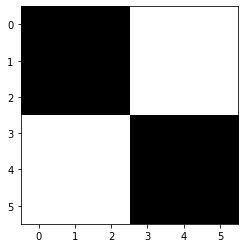

In [ ]:
# Tente pequenas variações no bit menos significativo, e tente visualizar alterações na imagem
# Por isso a técnica se chama Least Significant Bit (LSB) Steganography
b = 255 # 255 254 0b11111111 0b11111110 0b01111111
p = 0 # 0 1
tile = np.array([[p,p,p,b,b,b],
                 [p,p,p,b,b,b],
                 [p,p,p,b,b,b],
                 [b,b,b,p,p,p],
                 [b,b,b,p,p,p],
                 [b,b,b,p,p,p]
                 ], dtype=np.uint8)
print(tile)
# Criar um objeto imagem
img = Image.fromarray(tile).convert('L')
# Renderizar (exibir) a imagem
imshow(np.asarray(img), cmap='gray', vmin=0, vmax=255)

In [ ]:
# Tabela https://upload.wikimedia.org/wikipedia/commons/d/dd/ASCII-Table.svg
# Imprimir o código ascii da letra A
print(ord('A'))
txt_bytes = bitarray(endian='big')
# Transoformar a representação binária do código ASCII de A num bitarray
txt_bytes.frombytes(b'A')
# imprimir o bit array
print(txt_bytes)
# imprimir os bytes do bitarray
print(txt_bytes.tobytes())

65
bitarray('01000001')
b'A'


[0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[  0   1   0 254 254 254   0   1   0 254 254 254   0   0   0 254 254 254
 254 254 254   0   0   0 254 254 254   0   0   0 254 254 254   0   0   0]


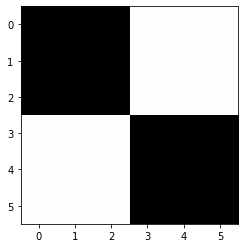

In [ ]:
tiles = np.array([[0,1,0,254,254,254],
                 [0,1,0,255,255,255],
                 [0,0,0,255,255,255],
                 [255,255,255,0,0,0],
                 [255,255,255,0,0,0],
                 [255,255,255,0,0,0]
                 ], dtype=np.uint8)
# Transforma um array bi-dimensional em uni-dimensional
flat_array = tiles.flatten()
# print(flat_array)
# Cria um array de zeros do mesmo tamanho do array unidimensional da imagem
txt_array = np.zeros(6*6, dtype=np.uint8)
# # Preenche o array com os valores da string 'A'
txt_array[0:len(txt_bytes)] = txt_bytes.tolist()
# # Zera o bit menos significativo do flat_array
flat_array = flat_array & 0b11111110
# # Preenche o bit menos significativo do flat_array com os bits da string 'A'
flat_array = flat_array | txt_array
print(txt_array)
print(flat_array)
# #tiles =
imgs = Image.fromarray(flat_array.reshape(6,6)).convert('L')
imshow(np.asarray(imgs), cmap='gray', vmin=0, vmax=255)

In [ ]:
# Transformar um objeto bi-dimensional num array un-idimensional.
array_encoded = np.asarray(imgs).flatten()
print(array_encoded)
print(array_encoded[0:8])

[  0   1   0 254 254 254   0   1   0 254 254 254   0   0   0 254 254 254
 254 254 254   0   0   0 254 254 254   0   0   0 254 254 254   0   0   0]
[  0   1   0 254 254 254   0   1]


In [ ]:
txt_bytes = bitarray("", endian='big')
print(txt_bytes)
txt_bytes.tobytes()

bitarray()


b''

In [ ]:
print(array_encoded[0] & 0b00000001)
print(array_encoded[1] & 0b00000001)

0
1


In [ ]:
lista_bits = []
for b in array_encoded[0:8]:
  print(b, b & 0b00000001)
  lista_bits.append(str(b & 0b00000001))
print("".join(lista_bits))

0 0
1 1
0 0
254 0
254 0
254 0
0 0
1 1
01000001


In [ ]:
bits_str = "".join(lista_bits)
txt_bytes = bitarray(bits_str, endian='big')
print(txt_bytes)
txt_bytes.tobytes()


bitarray('01000001')


b'A'

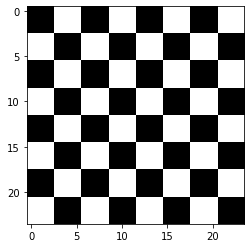

In [ ]:
arr_tiles = np.tile(tile, (4,4))
img_tiles = Image.fromarray(arr_tiles).convert('L')
imshow(np.asarray(img_tiles), cmap='gray', vmin=0, vmax=255)

In [ ]:
# Inspiração
# https://blog.4dcu.be/programming/2020/11/02/Steganography.html
# https://medium.com/swlh/lsb-image-steganography-using-python-2bbbee2c69a2
# https://towardsdatascience.com/hiding-data-in-an-image-image-steganography-using-python-e491b68b1372
# https://realpython.com/python-bitwise-operators/


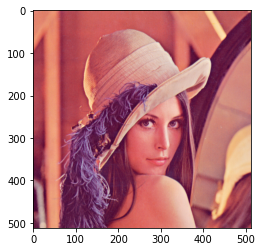

In [ ]:
urllib.request.urlretrieve(
  'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png',
   "gfg.png")

img = Image.open("gfg.png")
imshow(np.asarray(img))

97 0b1100001
98 0b1100010
16
(512, 512, 3) 786432
[226 137 125 226 137 125 223 137 133 223 136 128 226 138 120 226]
[0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0]
[226 137 125 226 136 124 222 137 132 223 137 128 226 138 121 226]


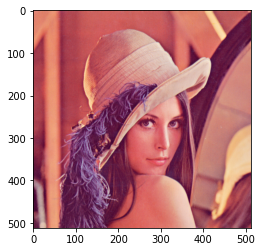

In [ ]:
input_im = img
text = "ab"
txt_bytes = bitarray(endian='big')
txt_bytes.frombytes(text.encode(encoding='utf-8'))
for i in text.encode():
  print(i, bin(i))

print(len(txt_bytes))
flat_array = np.asarray(input_im).flatten()
image_shape = np.asarray(input_im).shape
image_len = flat_array.size
print(image_shape, image_len)
txt_array = np.zeros(image_len, dtype=np.uint8)
txt_array[0:len(txt_bytes)] = txt_bytes.tolist()
print(flat_array[0:16])
flat_array = flat_array & 0b11111110
flat_array = flat_array | txt_array
print(txt_array[0:16])
print(flat_array[0:16])
encoded_im = np.array(flat_array).reshape(image_shape)
img_encoded = Image.fromarray(encoded_im).convert('RGB')
imshow(np.asarray(encoded_im))

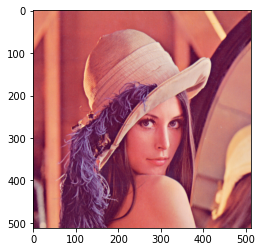

In [ ]:
from bitarray import bitarray

def encode_img(imgurl, text):
  urllib.request.urlretrieve(imgurl, "tmp.png")
  input_im = Image.open("tmp.png")
  txt_bytes = bitarray(endian='big')
  txt_bytes.frombytes((text+"<STOP>").encode(encoding='utf-8'))
  flat_array = np.asarray(input_im).flatten()
  image_shape = np.asarray(input_im).shape
  image_len = flat_array.size
  txt_array = np.zeros(image_len, dtype=np.uint8)
  txt_array[0:len(txt_bytes)] = txt_bytes.tolist()
  flat_array = flat_array & 0b11111110
  flat_array = flat_array | txt_array
  encoded_array = np.array(flat_array).reshape(image_shape)
  img_encoded = Image.fromarray(encoded_array).convert('RGB')
  return img_encoded

img_encoded = encode_img('https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png', "hello world! agora numa frase bem maior!!!!")
imshow(np.asarray(img_encoded))

In [ ]:
arr = np.asarray(img_encoded).flatten()
extracted_bits = [str(0b00000001 & value) for value in arr]
extracted_bits = ''.join(extracted_bits)
bt_text = bitarray(extracted_bits, endian='big').tobytes().decode()
bt_text
# n = int(extracted_bits, 2)
# n.to_bytes((n.bit_length() + 7) // 8, 'big').decode()

'hello world!<STOP>\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [ ]:
def decode_img(imgarray):
    arr = np.asarray(imgarray).flatten()
    extracted_bits = [str(0b00000001 & value) for value in arr]
    extracted_bits = ''.join(extracted_bits)
    # bt_text = bitarray(extracted_bits, endian='big').tobytes().decode()
    n = int(extracted_bits, 2)
    bt_text = n.to_bytes((n.bit_length() + 7) // 8, 'big').decode()
    return bt_text.split('<STOP>')[0]

decode_img(img_encoded)

'hello world! agora numa frase bem maior!!!!'